## Context 

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam. 

 

## Content 

# What is a Spam Filtering? 

Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox. 

 

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text. 

#### This corpus has been collected from free or free for research sources at the Internet: 

-> A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.  

-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.  

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# SETTING A customized plot style,font, figure and color
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
# monting the google drive to import the data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#importing dataset
# this above dataset is encoded in utf-8 unicode 
# so we will use latin-1 encoding to import the dataset
df = pd.read_csv(r"/content/gdrive/My Drive/spam.csv",encoding='latin-1') #Reading csv file
df.shape # looking at the shape

## There are more than 5000 rows of data and 5 columns or features

(5572, 5)

In [5]:
df.head() # looking at the first 5 rows

# We can see that there are 3 columns which are unnamed and having Null values

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.tail() # looking at the last 5 rows

# There might be Null values in all the rows of the Unnamed columns 2,3 and 4.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
df.tail(7) ## looking at random rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
## looking at the columns
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
#Checking the info about the dataset
df.info()

## There are almost all the null values in the unnamed columns with only 50 non-null values in Unnamed:2 column and 12 and 6 in the rest.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
## let's check the null values 
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

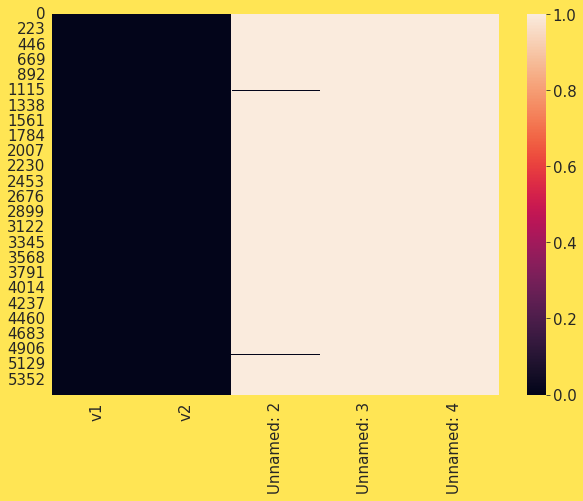

In [11]:
## plotting a heatmap
sns.heatmap(df.isnull())

## Data Cleaning

In [12]:
# checking the % of null values in each column
for i in df.columns:
    print('% of null values in',i,': ',df[i].isnull().sum()/5572*100)

## We can see there are more than 99% null values

% of null values in v1 :  0.0
% of null values in v2 :  0.0
% of null values in Unnamed: 2 :  99.10265613783201
% of null values in Unnamed: 3 :  99.78463747307968
% of null values in Unnamed: 4 :  99.89231873653985


In [13]:
## let's check the unique values of these columns except the v2 because it is full of emails
cols = [x for x in df.columns]
cols.remove('v2')
for i in cols:
  print('Unique Values of',i,df[i].unique())
  print('\n')

Unique Values of v1 ['ham' 'spam']


Unique Values of Unnamed: 2 [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u 

In [14]:
# checking if any other column has blank values(' '),special characters(?,-,_) etc to make sure the data is clean

special_chars =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"] # making list of possible special characters 

for col in df.columns:
    for char in special_chars:
        print(f"{char} in {col} = ",end= " ")
        print((df[col] == char).sum())
        
# It apperas there aren't columns with these special character values

  in v1 =  0
? in v1 =  0
- in v1 =  0
 ? in v1 =  0
 - in v1 =  0
?  in v1 =  0
-  in v1 =  0
 ?  in v1 =  0
 -  in v1 =  0
NA in v1 =  0
N/A in v1 =  0
 NA in v1 =  0
 N/A in v1 =  0
  in v2 =  0
? in v2 =  0
- in v2 =  0
 ? in v2 =  0
 - in v2 =  0
?  in v2 =  0
-  in v2 =  0
 ?  in v2 =  0
 -  in v2 =  0
NA in v2 =  0
N/A in v2 =  0
 NA in v2 =  0
 N/A in v2 =  0
  in Unnamed: 2 =  0
? in Unnamed: 2 =  0
- in Unnamed: 2 =  0
 ? in Unnamed: 2 =  0
 - in Unnamed: 2 =  0
?  in Unnamed: 2 =  0
-  in Unnamed: 2 =  0
 ?  in Unnamed: 2 =  0
 -  in Unnamed: 2 =  0
NA in Unnamed: 2 =  0
N/A in Unnamed: 2 =  0
 NA in Unnamed: 2 =  0
 N/A in Unnamed: 2 =  0
  in Unnamed: 3 =  0
? in Unnamed: 3 =  0
- in Unnamed: 3 =  0
 ? in Unnamed: 3 =  0
 - in Unnamed: 3 =  0
?  in Unnamed: 3 =  0
-  in Unnamed: 3 =  0
 ?  in Unnamed: 3 =  0
 -  in Unnamed: 3 =  0
NA in Unnamed: 3 =  0
N/A in Unnamed: 3 =  0
 NA in Unnamed: 3 =  0
 N/A in Unnamed: 3 =  0
  in Unnamed: 4 =  0
? in Unnamed: 4 =  0
- in Unnam

In [15]:
cols

['v1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [16]:
## Now let's drop the null values
cols.remove('v1') ## removing v1 from the cols list because it doesn't have any null values
print('Shape Before: ',df.shape)
for i in cols:
  df.drop([i],axis=1,inplace=True)
print('Shape After: ',df.shape)

## We can see that the null value columns have been removed

Shape Before:  (5572, 5)
Shape After:  (5572, 2)


In [17]:
# checking if there any duplicate rows
duplicates = df[df.duplicated()]
duplicates.shape

# There 403 duplicate values in the dataframe

(403, 2)

In [18]:
## let's look at the duplicates
duplicates.sample(8)

,v1,v2
3248,ham,"Sorry, I can't help you on this."
2521,ham,"Sorry, I'll call later"
4466,ham,"She said,'' do u mind if I go into the bedroom..."
102,ham,As per your request 'Melle Melle (Oru Minnamin...
4412,ham,Sad story of a Man - Last week was my b'day. M...
4242,ham,Okie...
2942,ham,No message..no responce..what happend?
1163,ham,"New Theory: Argument wins d SITUATION, but los..."


In [19]:
## Let's drop the duplicate rows
print('Shape Before: ',df.shape)
for i in df.columns:
  df.drop_duplicates(inplace=True)
print('Shape After: ',df.shape)

# We can say that the rows have been reduced

Shape Before:  (5572, 2)
Shape After:  (5169, 2)


In [20]:
df.sample(12)

,v1,v2
1467,ham,I wont touch you with out your permission.
4767,ham,I'm not sure if its still available though
838,spam,We tried to contact you re our offer of New Vi...
1890,ham,Ok but knackered. Just came home and went to s...
2832,spam,You've won tkts to the EURO2004 CUP FINAL or å...
1481,ham,"I'm a guy, browsin is compulsory"
4953,ham,U coming back 4 dinner rite? Dad ask me so i r...
263,spam,Hey I am really horny want to chat or see me n...
3152,ham,I tagged MY friends that you seemed to count a...
5092,ham,"My fri ah... Okie lor,goin 4 my drivin den go ..."


In [21]:
## for better viewing purpose
## renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1393,ham,Oh ok..
3714,ham,"I am late,so call you tomorrow morning.take ca..."
506,ham,"Maybe westshore or hyde park village, the plac..."
622,ham,MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...
5283,ham,"Yeah, probably here for a while"


In [22]:
## We can observe that our target column  is not encoded
## so we have to encode it first
from sklearn.preprocessing import LabelEncoder ## importing LE
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

df.head(3) ## looking at the dataframe again

## 0 represents not spam 1 represents spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


## EDA

In [23]:
df.dtypes

target     int64
text      object
dtype: object

In [24]:
## Let's see the unique value counts in the target
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

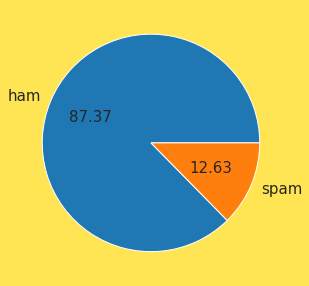

In [25]:
## plotting a barplot to understand visually
plt.figure(figsize=(15,5))
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


## We can clearly observe that the data is imbalanced
## And there are a very few spam messsges in the data

In [26]:
## Let's create new columns which represents the the number of words and letters and sentences in it.
import nltk ## importing nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
## To find the number of lettersor the length of the text column
df['letters_len'] = df['text'].apply(len)
## To find the num of words
df['words_len'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
## To find the num of sentences
df['sentences_len'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
## Looking at the dataframe again
df.sample(6)

,target,text,letters_len,words_len,sentences_len
4907,0,"I'm in solihull, | do you want anything?",40,11,1
1598,0,Daddy will take good care of you :),35,9,1
1038,0,"Edison has rightly said, \A fool can ask more ...",143,31,1
886,0,I like to talk pa but am not able to. I dont k...,52,16,2
4796,1,Santa calling! Would your little ones like a c...,158,30,4
2042,0,"Me not waking up until 4 in the afternoon, sup",46,11,1


In [28]:
## let's check the description of the newly created columns
print(df[['letters_len','words_len','sentences_len']].describe())
print('\n')

## Now let's check it with respect to the non spam target i.e., 0
print(df[df['target'] == 0][['letters_len','words_len','sentences_len']].describe())
print('\n')

## Now with respect to the spam target
print(df[df['target'] == 1][['letters_len','words_len','sentences_len']].describe())

       letters_len    words_len  sentences_len
count  5169.000000  5169.000000    5169.000000
mean     78.977945    18.453279       1.947185
std      58.236293    13.324793       1.362406
min       2.000000     1.000000       1.000000
25%      36.000000     9.000000       1.000000
50%      60.000000    15.000000       1.000000
75%     117.000000    26.000000       2.000000
max     910.000000   220.000000      28.000000


       letters_len    words_len  sentences_len
count  4516.000000  4516.000000    4516.000000
mean     70.459256    17.120903       1.799601
std      56.358207    13.493725       1.278465
min       2.000000     1.000000       1.000000
25%      34.000000     8.000000       1.000000
50%      52.000000    13.000000       1.000000
75%      90.000000    22.000000       2.000000
max     910.000000   220.000000      28.000000


       letters_len   words_len  sentences_len
count   653.000000  653.000000     653.000000
mean    137.891271   27.667688       2.967841
std      30.

## Visualization

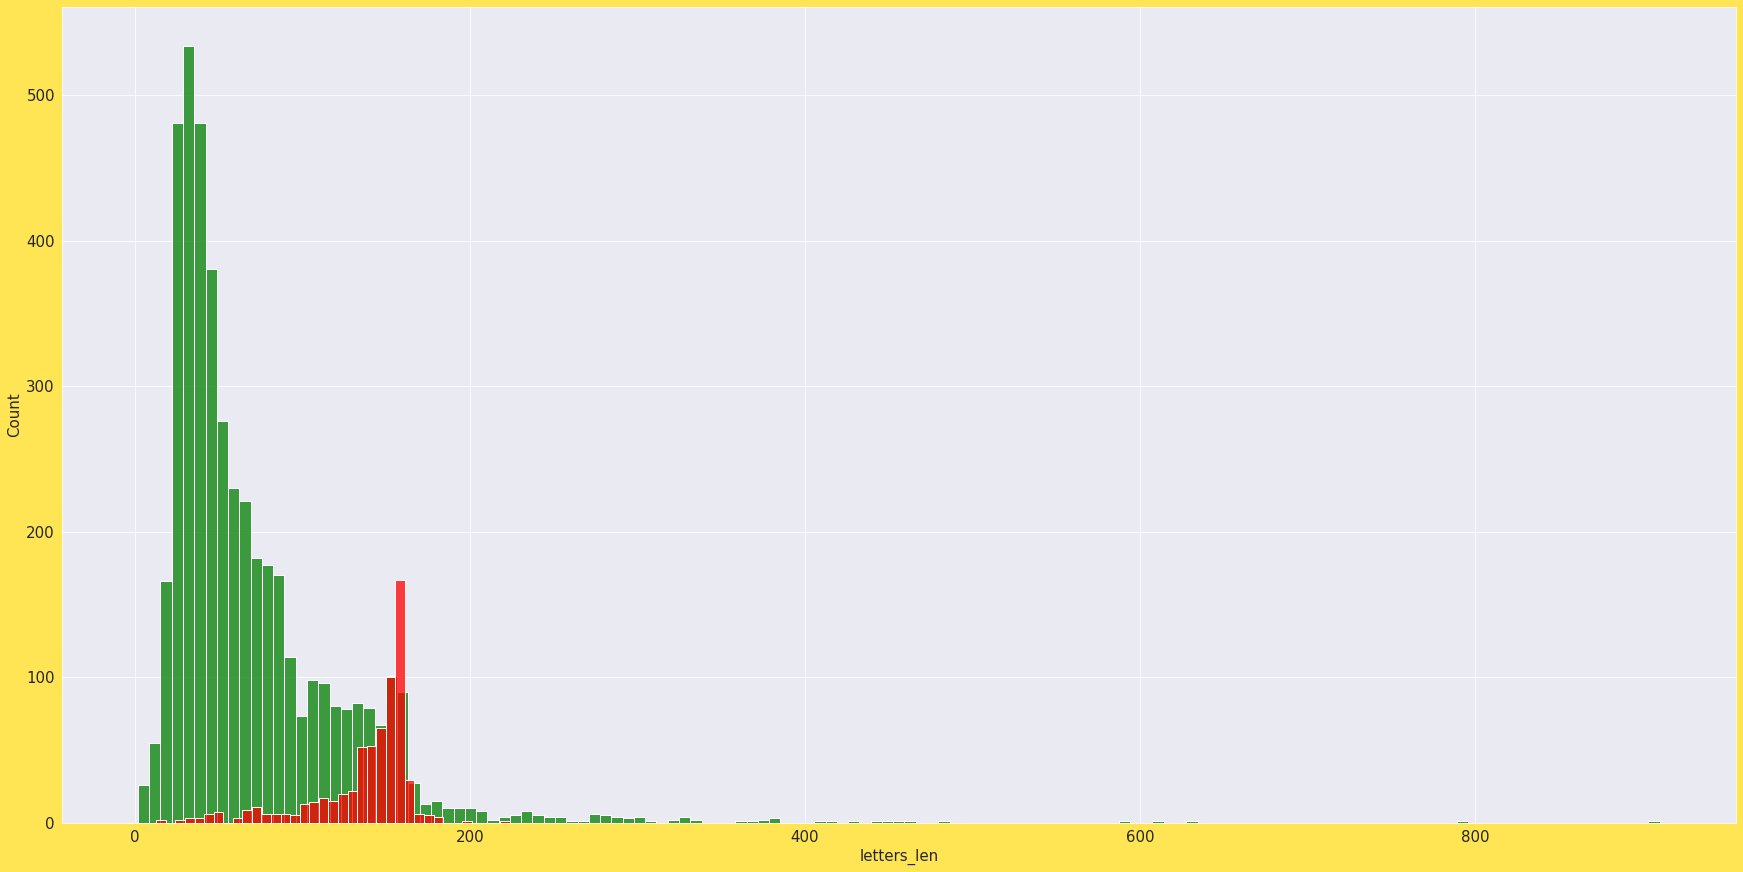

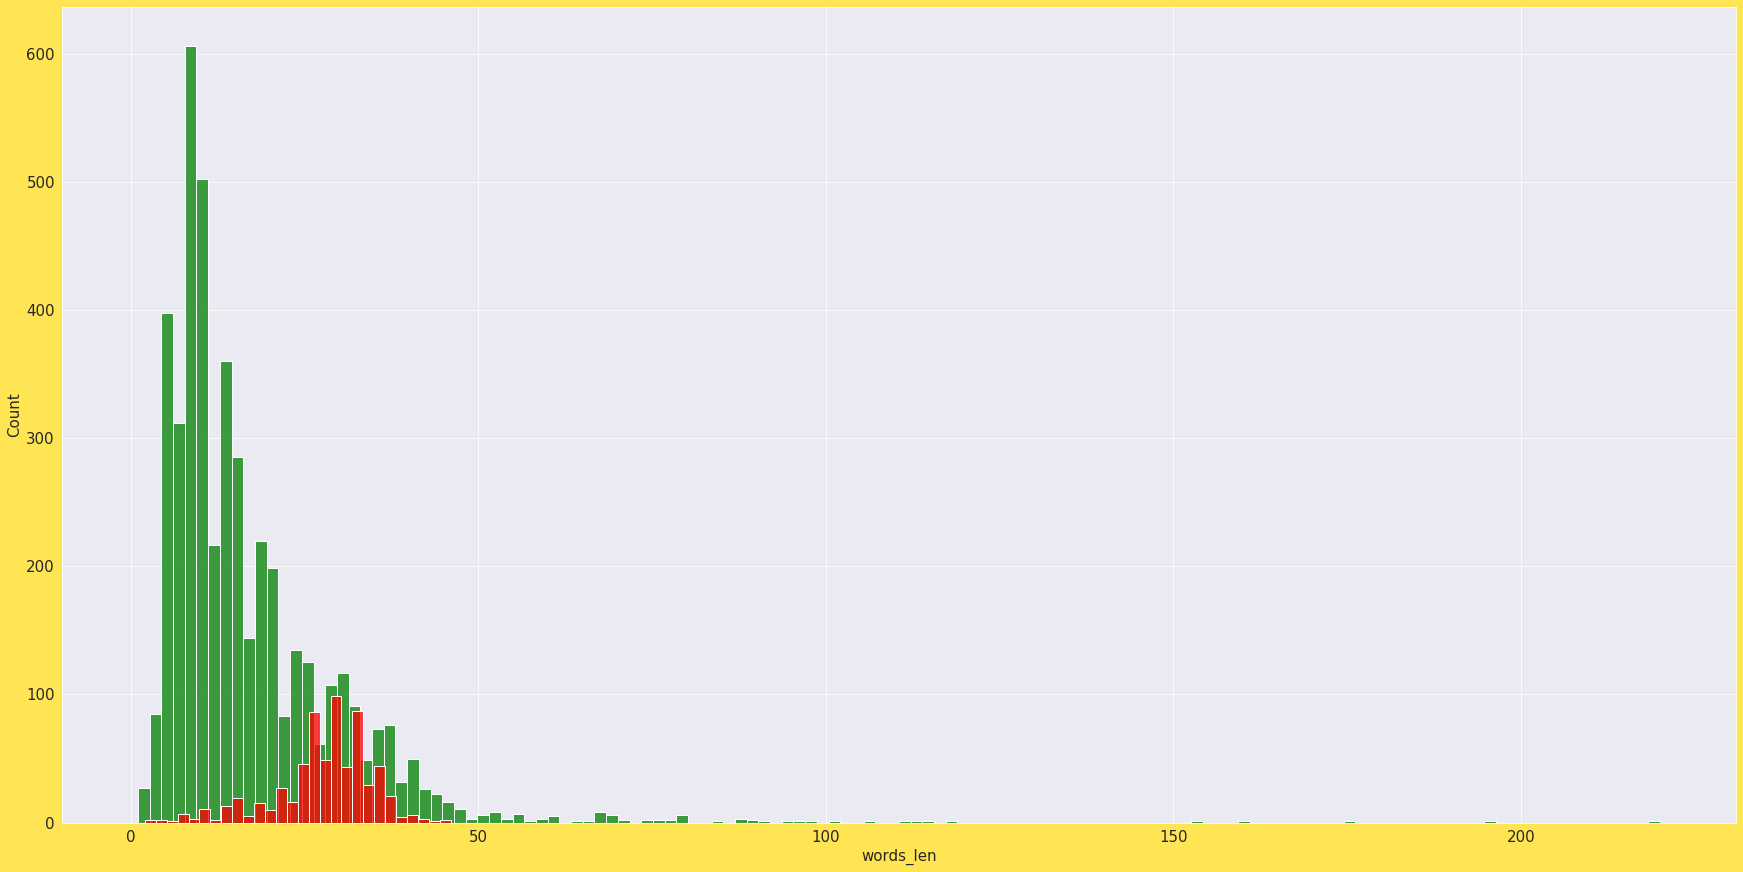

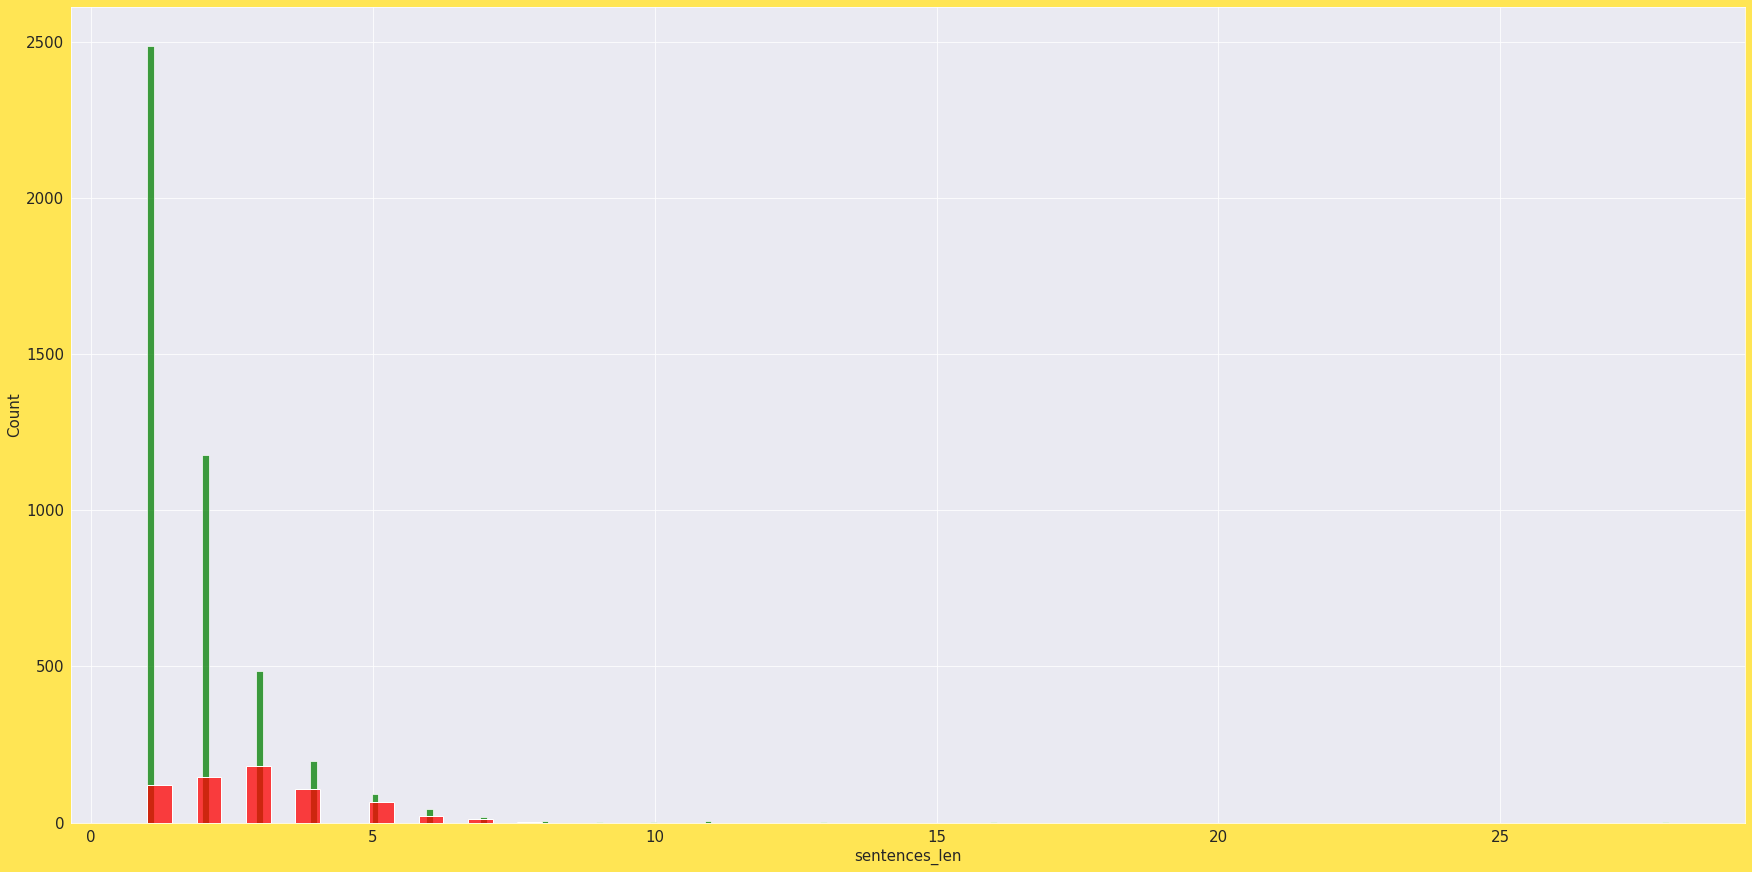

In [29]:
new_cols = ['letters_len','words_len','sentences_len']
for i in new_cols:
  plt.figure(figsize=(30,15))
  sns.histplot(df[df['target'] == 0][i],color='green') ## not spam = green colour
  sns.histplot(df[df['target'] == 1][i],color='red') ## spam = red colour


## Observations:

-> We can see that for email with increase in letters the possibility of the spam increases.

-> And if the letters are more than 150 in an email it is more likely to be a spam one.

-> Similarly, most spam emails are having the number of words in the range between 0-50. And more than 25 words has a chance of being a spam.

-> Moreover the emails with more than 2 sentences are more likely to be spam.

<Figure size 1440x720 with 0 Axes>

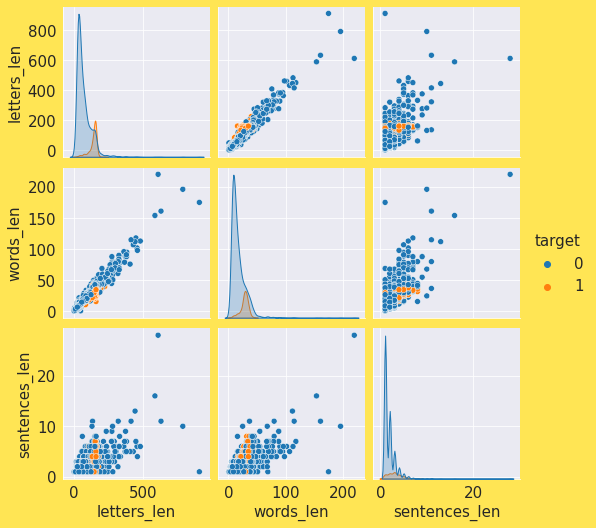

In [30]:
## plotting a pairplot to look at the distribution and corrrelation with respect to target
plt.figure(figsize=(20,10))
sns.pairplot(df,hue='target')

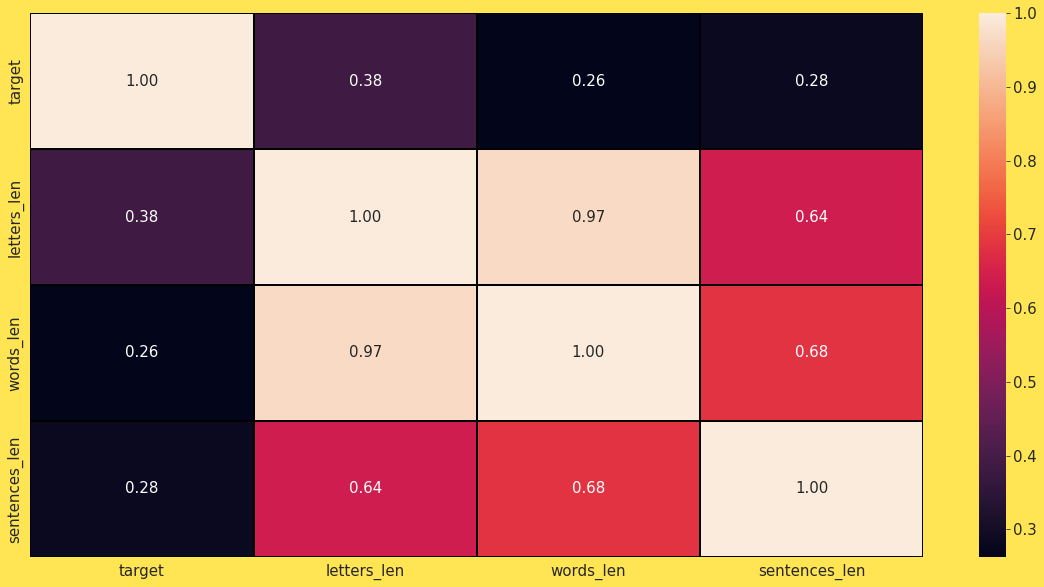

In [31]:
## Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=1.0,linecolor='black',fmt='.2f')

## Data Preprocessing
#### In this we will perform:-
Lower case

Tokenization

Removing special characters

Removing stopwords

In [32]:
## importing all the necessary pacakges
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
## importing wordnet
nltk.download('wordnet')
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
## importing powerstreamer and making it an instance
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving') ## let's see if it works

'love'

In [34]:
## Writing a function for lowering the text and tokenizing the words
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
## let's check if the function works, using a random sentence
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
## creating a new feature of the transformet text column
df['transformed_text'] = df['text'].apply(transform_text)

In [37]:
## looking at the df again
df.head()

,target,text,letters_len,words_len,sentences_len,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Text(0.5, 1.0, 'Frequently appeard words in spam emails')

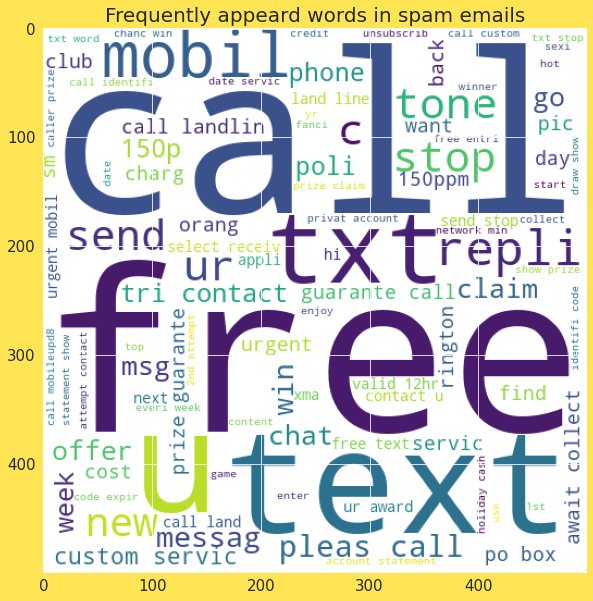

In [38]:
## To see the frequently used words with respect to spam emails
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(30,10))
plt.imshow(spam_wc)
plt.title("Frequently appeard words in spam emails", fontsize=20)

Text(0.5, 1.0, 'Frequently appeard words in non-spam emails')

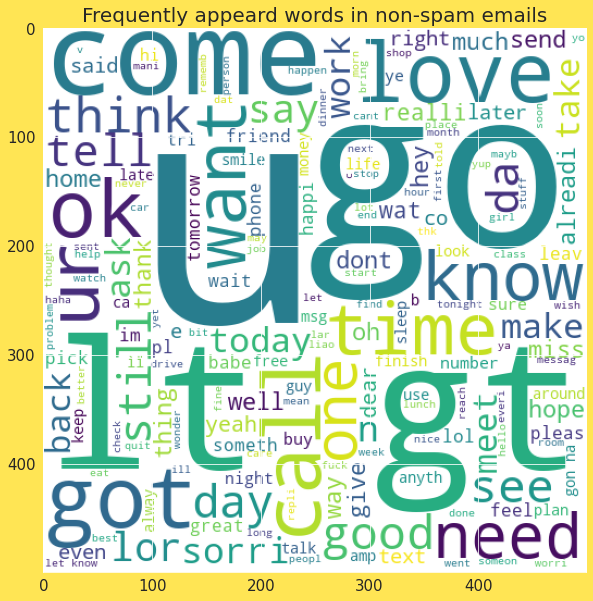

In [39]:
## Now with respect to non spam emails
spam_wn = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(30,10))
plt.imshow(spam_wn)
plt.title("Frequently appeard words in non-spam emails", fontsize=20)

In [40]:
## making a list of the spam words
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

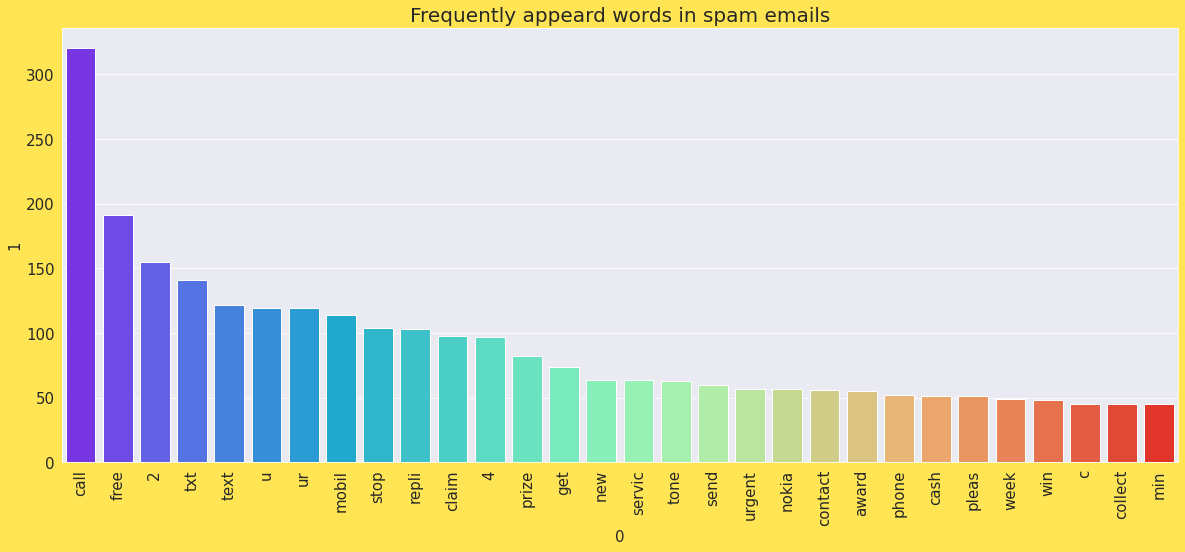

In [41]:
## Making a barplot of the most common occured words
from collections import Counter
plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='rainbow')
plt.xticks(rotation='vertical')
plt.title("Frequently appeard words in spam emails", fontsize=20)
plt.show()

## We can 

In [42]:
## making a list of nonspam words 
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

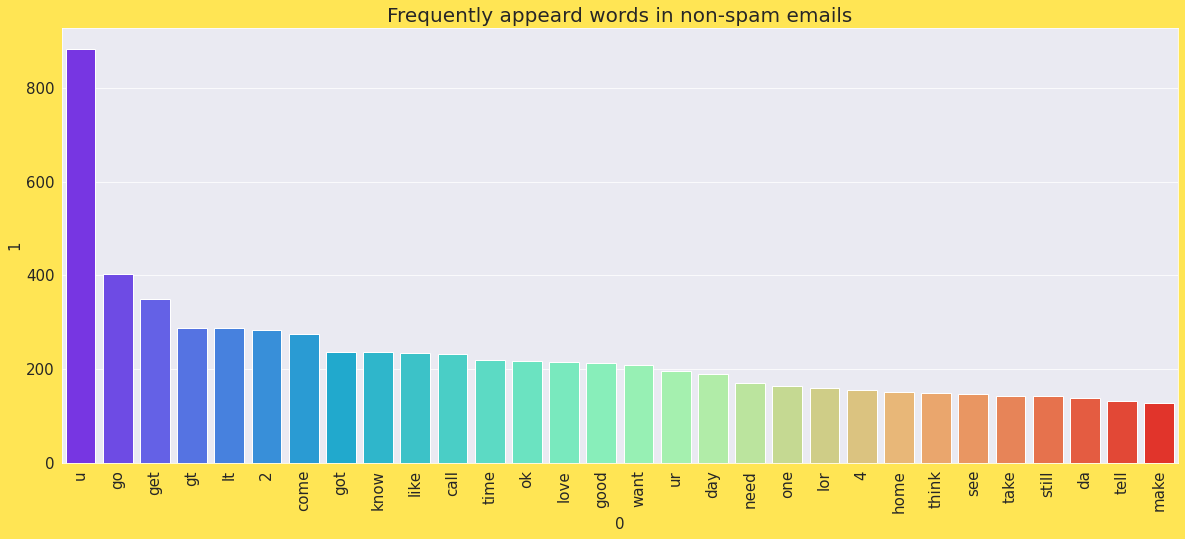

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='rainbow')
plt.xticks(rotation='vertical')
plt.title("Frequently appeard words in non-spam emails", fontsize=20)
plt.show()

In [44]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,letters_len,words_len,sentences_len,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(5169, 3000)

In [48]:
y = df['target'].values ## y as target

In [49]:
## importing the necessary libraries and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [50]:
## Making the instances of the models

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
## Creating a dictionary of all the models
clfs = {
    'SVC' : svc,
    'KNC' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'gnb':gnb,
    'mnb':mnb,
    'bnb':bnb}

In [52]:
## taking a 80-20 spli of the data for features and the target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
## Creating a function to run the model and to print the accuracy and precesion score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [54]:
## Let's see if the function is working
train_classifier(svc,X_train,y_train,X_test,y_test)

## We can see that supportvector is giving 97% accuracy and precesion score

(0.9758220502901354, 0.9747899159663865)

In [55]:
## Now let's run the same for all the models 
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print(name.upper(),':-')
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



SVC :-
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


KNC :-
Accuracy -  0.9052224371373307
Precision -  1.0


DT :-
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416


LR :-
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703


RF :-
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


ADABOOST :-
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


BGC :-
Accuracy -  0.9574468085106383
Precision -  0.8671875


ETC :-
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


GBDT :-
Accuracy -  0.9477756286266924
Precision -  0.92


XGB :-
Accuracy -  0.9439071566731141
Precision -  0.9347826086956522


GNB :-
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932


MNB :-
Accuracy -  0.9709864603481625
Precision -  1.0


BNB :-
Accuracy -  0.9835589941972921
Precision -  0.991869918699187




In [56]:
## Creating a dataframe to show every model and it's precision and accuracy score respectively
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [57]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.905222,1.000000
11,mnb,0.970986,1.000000
12,bnb,0.983559,0.991870
4,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
9,xgb,0.943907,0.934783
5,AdaBoost,0.960348,0.929204
8,GBDT,0.947776,0.920000


In [58]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.905222
1,mnb,Accuracy,0.970986
2,bnb,Accuracy,0.983559
3,RF,Accuracy,0.974855
4,SVC,Accuracy,0.975822
5,ETC,Accuracy,0.974855
6,LR,Accuracy,0.958414
7,xgb,Accuracy,0.943907
8,AdaBoost,Accuracy,0.960348
9,GBDT,Accuracy,0.947776


## Model Selection

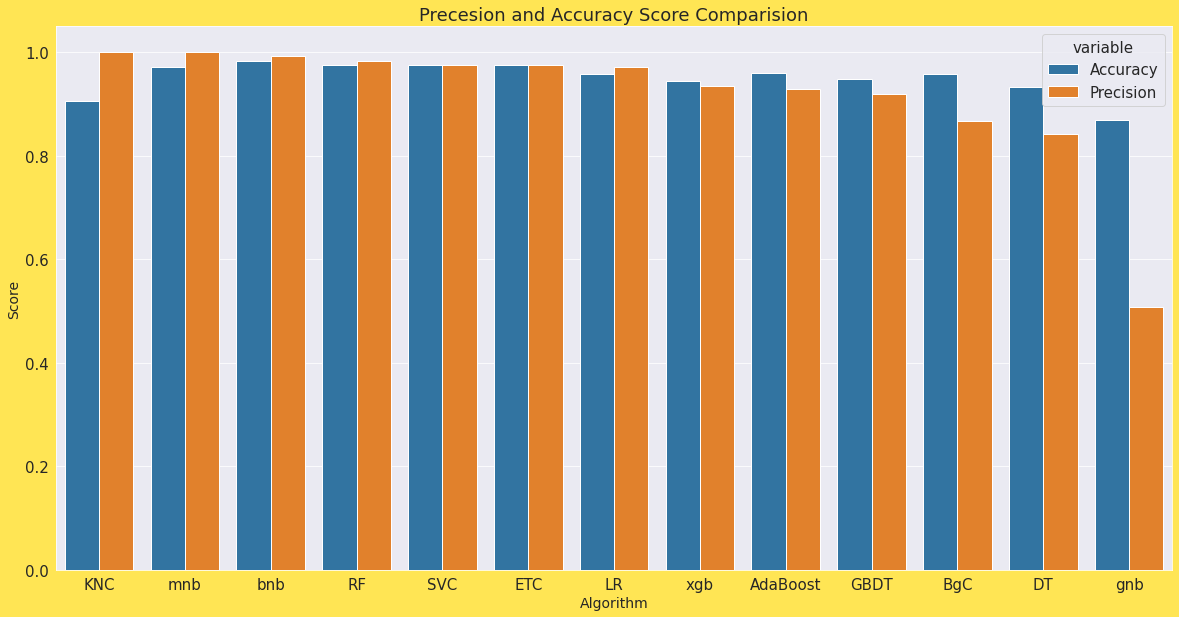

In [78]:
## plotting a cat plot to show the comparision of accuracy and precesion score of each model
plt.figure(figsize=(20,10))
sns.barplot(x='Algorithm',y='value',hue='variable',data=performance_df1) 
plt.xlabel('Algorithm',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precesion and Accuracy Score Comparision',fontsize=18)
plt.show()



In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [81]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [83]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNC,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,mnb,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,bnb,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870
3,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
6,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
7,xgb,0.943907,0.934783,0.943907,0.934783,0.943907,0.934783,0.943907,0.934783
8,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
9,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000


In [84]:
# Now let's check the same with the Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [85]:
## importing voting classifier
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [86]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [88]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


## Model Saving 

In [89]:
## Saving MultinomialNB as our best model becuase it has almost same % of accuracy and precesion score
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

  # THE END